In [2]:
#!pip uninstall umap
!pip install umap-learn
!pip install dataget
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataget
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from scipy import io
from PIL import Image
import os
from gensim.downloader import load

     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 42.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=5c5bc908a7a9be7e482739353c7cb31c37e48652698f2e1f1f852feb8217e977
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=84968bfa54e1ae17c921e45b1cce68aeaf9b6ac48f280516387bc36c2d7d466a
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |████████████████████████████████| 77 kB 3.2 MB/s 
     |████████████████████████████████| 1.3 MB 11.1 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha

In [3]:
umap = UMAP(random_state=20)
tsne = TSNE(n_components=2, random_state=20)
pca = PCA(n_components=2, random_state=20)

In [4]:
algos = [('UMAP', umap), ('PCA', pca), ('TSNE', tsne)]

x_train, y_train, x_test, y_test = dataget.image.mnist().get()
mnist = np.vstack([x_train.reshape((x_train.shape[0], -1)), x_test.reshape((x_test.shape[0], -1))])
mnist_y = np.hstack([y_train, y_test])

x_train, y_train, x_test, y_test = dataget.image.fashion_mnist().get()
fmnist = np.vstack([x_train.reshape((x_train.shape[0], -1)), x_test.reshape((x_test.shape[0], -1))])
fmnist_y = np.hstack([y_train, y_test])

!wget https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
!mv COIL20.mat?raw=true coil20.mat 
mat_contents = io.loadmat('coil20.mat')
coil20 = mat_contents['X']
coil20_y = mat_contents['Y']

word_vectors = load('word2vec-google-news-300').vectors
word_vectors = word_vectors[:5000]

datas = [('COIL20', coil20, coil20_y), ('MNIST', mnist, mnist_y), ('FMNIST', fmnist, fmnist_y), ('Word Vectors', word_vectors, None)]

--2021-11-24 10:52:24--  https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
Resolving jundongl.github.io (jundongl.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jundongl.github.io (jundongl.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3024549 (2.9M) [application/octet-stream]
Saving to: ‘COIL20.mat?raw=true’

COIL20.mat?raw=true 100%[===================>]   2.88M  --.-KB/s    in 0.07s   

2021-11-24 10:52:24 (41.4 MB/s) - ‘COIL20.mat?raw=true’ saved [3024549/3024549]

[==================================================] 100.0% 1662.8/1662.8MB downloaded


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


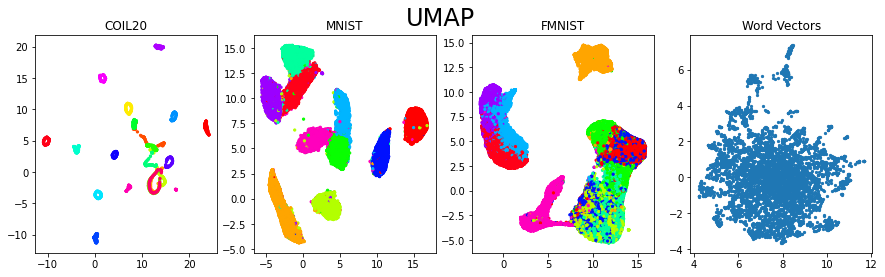

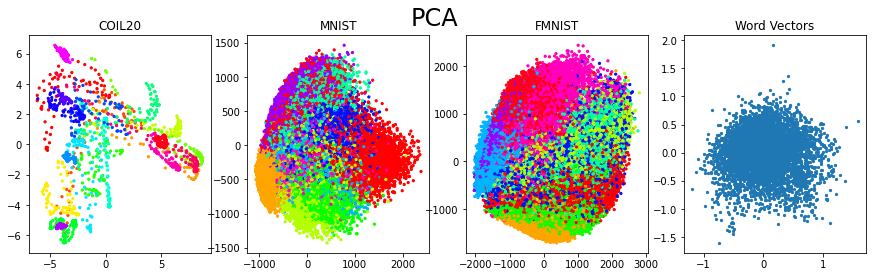

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

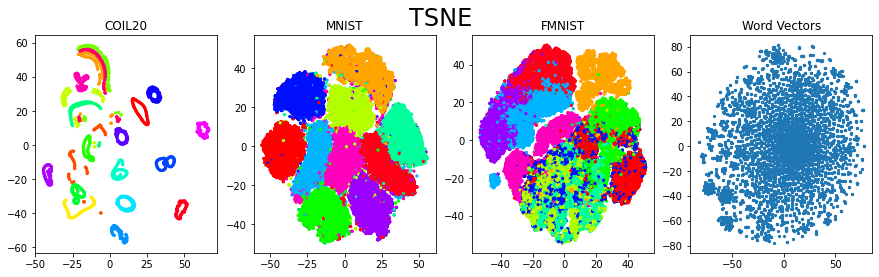

In [5]:
for i in range(len(algos)):
    figure, axis = plt.subplots(1, len(datas), figsize=(15,4))
    alg = algos[i][1]
    for j in range(len(datas)):
        dataset = datas[j][1]
        dataset_y = datas[j][2]
        dataset_c = alg.fit_transform(dataset)
        axis[j].set_title(datas[j][0])
        axis[j].scatter(dataset_c[:,0], dataset_c[:,1], c=dataset_y, cmap='hsv', s= 5)
    figure.suptitle(algos[i][0], fontsize=24)
    plt.show()